#4월 30일 시험문제(온라인 쇼핑 문제)
1.Cusomer_id 와 total, qunatity, price를 groupby하고 새로운 결과를 도출하시오.(코드 및 figure까지)

2. 문자열에 대한 인코딩을 하여서 제출하시오.(코드 및 결과까지)

3. 모델을 선택하여 학습을 하고, 정확도,recall,precision을 출력하여서 제출하시오.

4. Feature engineering을 이용하여서 학습을 진행한 후 좀 더 좋아졌다면 왜 좋아졌는지 혹은 안 좋아졌다면 왜 안좋아졌는지를 서술하시오.

5.피쳐 중요도 플롯을 제출하시오.

In [ ]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import os, sys, gc, warnings, random

import datetime
import dateutil.relativedelta

# Data manipulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GroupKFold
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

from tqdm.notebook import trange, tqdm

from IPython.display import display

%matplotlib inline

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [ ]:
#Problem solving

df= pd.read_csv('/content/drive/MyDrive/kaggle/해커톤/train.csv')

In [ ]:
df1=df.copy()

#EDA ( 탐색적 자료분석 단계)
1. data describe 찍기, na/null 값 해결
2. dropped description
3. stripped C in order_id
4. transformed order_date to y-m 
5. label encoded country


In [ ]:
df.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50


In [ ]:
df.columns

Index(['order_id', 'product_id', 'description', 'quantity', 'order_date',
       'price', 'customer_id', 'country', 'total'],
      dtype='object')

In [ ]:
df.describe()

,quantity,price,customer_id,total
count,780502.000000,780502.000000,780502.000000,780502.000000
mean,12.623307,6.140931,15313.393466,33.715373
std,143.906302,119.042266,1695.765797,274.207403
min,-74215.000000,0.000000,12346.000000,-127352.940000
25%,2.000000,2.062500,13963.000000,7.260000
50%,5.000000,3.217500,15239.000000,19.470000
75%,12.000000,6.187500,16788.000000,32.175000
max,74215.000000,64300.500000,18287.000000,127352.940000


In [ ]:
df.shape
#78502 rows and 9 cols

(780502, 9)

In [ ]:
#are there any na/null vals
print(df.isna().any())
print(df.isnull().any())
#no na or null vals

order_id       False
product_id     False
description    False
quantity       False
order_date     False
price          False
customer_id    False
country        False
total          False
dtype: bool
order_id       False
product_id     False
description    False
quantity       False
order_date     False
price          False
customer_id    False
country        False
total          False
dtype: bool


In [ ]:
len(df.country.unique()) #41 countries

41

In [ ]:
df.country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [ ]:
df.country.value_counts()

United Kingdom          700317
Germany                  16999
EIRE                     15694
France                   13557
Netherlands               5051
Spain                     3683
Switzerland               3058
Belgium                   3012
Portugal                  2312
Australia                 1890
Channel Islands           1640
Italy                     1499
Sweden                    1341
Norway                    1235
Cyprus                    1153
Finland                   1035
Austria                    931
Denmark                    786
Greece                     627
Japan                      557
Poland                     527
Unspecified                521
USA                        492
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      294
Canada                     228
Iceland                    211
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

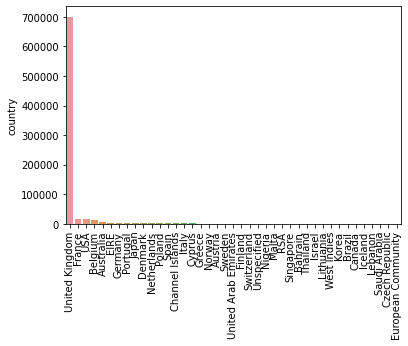

In [ ]:
sns.barplot(x=df.country.unique(), y= df.country.value_counts())
plt.xticks(rotation=90)
#UK 에 데이터 많이 있음

In [ ]:
df['o_countries']=1
df.loc[df.country.isin(['United Kingdom']),'o_countries']=0
df.o_countries.value_counts()
df=df.drop('o_countries',axis=1)

In [ ]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175


In [ ]:
#drop description 
df.drop('description',axis=1, inplace=True)

In [ ]:
df

,order_id,product_id,quantity,order_date,price,customer_id,country,total
0,489434,85048,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100
1,489434,79323P,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
2,489434,79323W,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
3,489434,22041,48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200
4,489434,21232,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...
780497,C579886,22197,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025
780498,C579886,23146,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285
780499,C579887,84946,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625
780500,C579887,85048,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175


In [ ]:
df.order_id

0          489434
1          489434
2          489434
3          489434
4          489434
           ...   
780497    C579886
780498    C579886
780499    C579887
780500    C579887
780501    C579887
Name: order_id, Length: 780502, dtype: object

In [ ]:
#order_id의 C문자 지우기
df['order_id']=df['order_id'].str.strip('C')

In [ ]:
df['order_id']

0         489434
1         489434
2         489434
3         489434
4         489434
           ...  
780497    579886
780498    579886
780499    579887
780500    579887
780501    579887
Name: order_id, Length: 780502, dtype: object

In [ ]:
#need to change to neumeric vals
df['order_id']=df['order_id'].apply(lambda x : int(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780502 entries, 0 to 780501
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     780502 non-null  int64  
 1   product_id   780502 non-null  object 
 2   quantity     780502 non-null  int64  
 3   order_date   780502 non-null  object 
 4   price        780502 non-null  float64
 5   customer_id  780502 non-null  int64  
 6   country      780502 non-null  object 
 7   total        780502 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 47.6+ MB


In [ ]:
#order date을 바꿔주기
import datetime
import dateutil.relativedelta

df['new_date']=pd.to_datetime(df.order_date).dt.strftime('%Y-%m')

In [ ]:
#order date drop하기
df.drop('order_date',axis=1,inplace=True)

In [ ]:
#country label encoding 해주기
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['country']=le.fit_transform(df['country'])

In [ ]:
df.country.unique()

array([38, 13, 36,  3,  0, 10, 14, 28, 19,  9, 24, 27, 32,  6, 18,  7, 15,
       26,  1, 33, 37, 12, 34, 39, 25, 23, 29, 31,  2, 35, 17, 22, 40, 20,
        4,  5, 16, 21, 30,  8, 11])

In [ ]:
df.columns

Index(['order_id', 'product_id', 'quantity', 'price', 'customer_id', 'country',
       'total', 'new_date'],
      dtype='object')

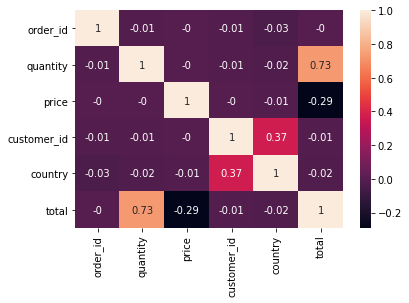

In [ ]:
#correlation matrix

corr= df.corr().round(2)
sns.heatmap(corr, annot=True)

In [ ]:
len(df.customer_id.unique()) #5914개의 customer id

5914

In [ ]:
df

,order_id,product_id,quantity,price,customer_id,country,total,new_date
0,489434,85048,12,11.4675,13085,38,137.6100,2009-12
1,489434,79323P,12,11.1375,13085,38,133.6500,2009-12
2,489434,79323W,12,11.1375,13085,38,133.6500,2009-12
3,489434,22041,48,3.4650,13085,38,166.3200,2009-12
4,489434,21232,24,2.0625,13085,38,49.5000,2009-12
...,...,...,...,...,...,...,...,...
780497,579886,22197,-1,1.4025,15676,38,-1.4025,2011-11
780498,579886,23146,-1,5.4285,15676,38,-5.4285,2011-11
780499,579887,84946,-1,2.0625,16717,38,-2.0625,2011-11
780500,579887,85048,-1,13.1175,16717,38,-13.1175,2011-11


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

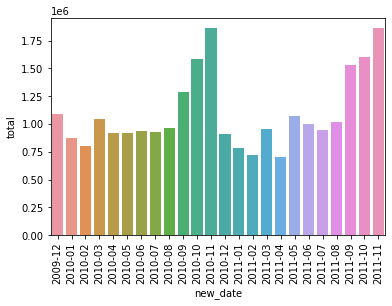

In [ ]:
#월별 barplot
sns.barplot(x=df.groupby(['new_date']).sum().total.index, y=df.groupby(['new_date']).sum().total)
plt.xticks(rotation=90)
#계절성 시계열 데이터의 형태를 띔 - 도매 시장 특성상 연말 대비 물건 쟁여 두려고 9-11에 많을 수도 있음

In [ ]:
#customer 별로 groupby
grouped_c=df.groupby(['customer_id']).sum().reset_index()

In [ ]:
corr=grouped_c.corr().round(2)

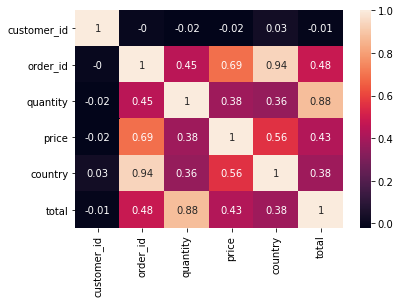

In [ ]:
corr
sns.heatmap(corr, annot=True)
#customer별 그룹 한 것으로 corr matrix 찍었을 때 total과의 상관관계중 quantity가 가장 높게 나온다.
#수량이 많아질수록 당연히 total값이 높아지기 때문이라고 생각

In [ ]:
grouped_c.head()

,customer_id,order_id,quantity,price,country,total
0,12346,23952992,53,936.3750,1786,-85.3710
1,12347,116100906,2775,892.6995,3376,7749.5715
2,12348,27352485,2714,318.6150,612,3332.0100
3,12349,97533644,1619,2482.5735,3240,7267.4910
4,12350,9231629,197,107.7450,442,551.7600


In [ ]:
list1= [1 for x in grouped_c.total if x>300]
list0= [0 for x in grouped_c.total if x<300]

In [ ]:
print(len(list1),len(list0))
#날짜 상관 없이 300이상 spend한 고객이 그러지 않은 고객보다 많다

5084 830


In [ ]:
#drop description & labelencoded country
df1.drop('description',axis=1,inplace=True)
df1['country']=le.fit_transform(df1['country'])

In [ ]:
df1

,order_id,product_id,quantity,order_date,price,customer_id,country,total
0,489434,85048,12,2009-12-01 07:45:00,11.4675,13085,38,137.6100
1,489434,79323P,12,2009-12-01 07:45:00,11.1375,13085,38,133.6500
2,489434,79323W,12,2009-12-01 07:45:00,11.1375,13085,38,133.6500
3,489434,22041,48,2009-12-01 07:45:00,3.4650,13085,38,166.3200
4,489434,21232,24,2009-12-01 07:45:00,2.0625,13085,38,49.5000
...,...,...,...,...,...,...,...,...
780497,C579886,22197,-1,2011-11-30 17:39:00,1.4025,15676,38,-1.4025
780498,C579886,23146,-1,2011-11-30 17:39:00,5.4285,15676,38,-5.4285
780499,C579887,84946,-1,2011-11-30 17:42:00,2.0625,16717,38,-2.0625
780500,C579887,85048,-1,2011-11-30 17:42:00,13.1175,16717,38,-13.1175


In [ ]:
#group by customer_id and new_date

standard= ['customer_id'] + ['new_date']
data=df1.copy()

#new df by time
data.order_date= pd.to_datetime(data.order_date)
times = pd.date_range('2009-12-01', periods= (data.order_date.max() - data.order_date.min()).days + 1, freq='1d')  
customerid_frame = np.repeat(data.customer_id.unique(), len(times))
date_frame =np.tile(times, len(data.customer_id.unique())) #tile = 반복행렬 만들기

frame = pd.DataFrame({'customer_id':customerid_frame,'order_date':date_frame}) #repeated cust_id and order_date
# print(len(customerid_frame), len(date_frame))
frame['new_date']=pd.to_datetime(frame.order_date).dt.strftime('%Y-%m') #year and month frame


In [ ]:
data['new_date']= pd.to_datetime(df1.order_date).dt.strftime('%Y-%m')
data_group= data.groupby(standard).sum().reset_index() #구매내역 있는 거만 표시
frame_group=frame.groupby(standard).count().reset_index().drop('order_date',axis=1) #구매 내역이 있던 없던 모든 날짜 포함

In [ ]:
type(data_group)
type(frame_group)

pandas.core.frame.DataFrame

In [ ]:
df_merge= pd.merge(frame_group, data_group, on=standard,how='left').fillna(0)
df_merge=df_merge.rename(columns={'new_date': 'year_month'})

In [ ]:
df_merge.drop('country',axis=1, inplace=True)

In [ ]:
df2=df_merge.copy()

In [ ]:
df2
#cust_id & year_month별로 groupby 해서 merge 시킨 data

In [ ]:
df2['label']=(df2['total']>300).astype(int)

In [ ]:
df2.head(10)

,customer_id,year_month,quantity,price,total,label
0,12346,0,26.0,31.3500,187.2750,0
1,12346,1,19.0,200.4750,-22.2750,0
2,12346,2,0.0,0.0000,0.0000,0
3,12346,3,5.0,44.6325,44.6325,0
4,12346,4,0.0,0.0000,0.0000,0
5,12346,5,0.0,0.0000,0.0000,0
6,12346,6,5.0,647.4105,-285.9285,0
7,12346,7,0.0,0.0000,0.0000,0
8,12346,8,0.0,0.0000,0.0000,0
9,12346,9,0.0,0.0000,0.0000,0


In [ ]:
df2['year_month']=le.fit_transform(df2.year_month)

In [ ]:
#2011-11 을 기준으로 train test 나누기
train=df2[df2.year_month<23]
test=df2[df2.year_month==23]

In [ ]:
print(train.head())
print(test.head())

   customer_id  year_month  quantity     price     total  label
0        12346           0      26.0   31.3500  187.2750      0
1        12346           1      19.0  200.4750  -22.2750      0
2        12346           2       0.0    0.0000    0.0000      0
3        12346           3       5.0   44.6325   44.6325      0
4        12346           4       0.0    0.0000    0.0000      0
     customer_id  year_month  quantity    price      total  label
23         12346          23       0.0    0.000     0.0000      0
47         12347          23       0.0    0.000     0.0000      0
71         12348          23       0.0    0.000     0.0000      0
95         12349          23     631.0  998.415  2899.9575      1
119        12350          23       0.0    0.000     0.0000      0


In [ ]:
x_train=train.iloc[:,:4]
y_train=train.iloc[:,-1]

In [ ]:
x_test=test.iloc[:,:4]
y_test=test.iloc[:,-1]

In [ ]:
x_train
# y_train

,customer_id,year_month,quantity,price
0,12346,0,26.0,31.3500
1,12346,1,19.0,200.4750
2,12346,2,0.0,0.0000
3,12346,3,5.0,44.6325
4,12346,4,0.0,0.0000
...,...,...,...,...
141930,18287,18,0.0,0.0000
141931,18287,19,0.0,0.0000
141932,18287,20,0.0,0.0000
141933,18287,21,0.0,0.0000


In [ ]:
for i in x_train:
  print(i)

customer_id
year_month
quantity
price


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)



score_train = gbc.score(x_train, y_train)

print('{:.3f}'.format(score_train))

score_test = gbc.score(x_test, y_test) 

print('{:.3f}'.format(score_test))

0.982
0.971


Feature importances:
[0.    0.    0.976 0.024]


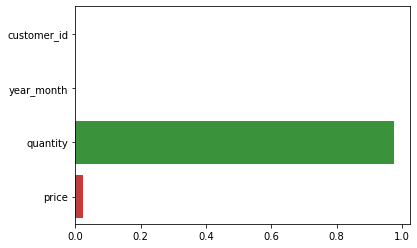

In [ ]:
# feature importance 추출 
# print("Feature importances:\n{0}".format(np.round(gbc.feature_importances_, 3)))
# sns.barplot(x=gbc.feature_importances_ , y=[x for x in x_train])

In [ ]:
df1['year_month']=pd.to_datetime(df1.order_date).dt.strftime('%Y-%m')

In [ ]:
cust=df1[df1['year_month']<'2011-11']['customer_id'].unique() #2011-11전 데이터의 customerid
ym=df1[df1['year_month']=='2011-11'] #2011-11의 모든 데이터
nov = pd.DataFrame({'customer_id':cust})
nov['year_month']='2011-11'

In [ ]:
nov

,customer_id,year_month
0,13085,2011-11
1,13078,2011-11
2,15362,2011-11
3,18102,2011-11
4,12682,2011-11
5,18087,2011-11
6,13635,2011-11
7,14110,2011-11
8,12636,2011-11
9,17519,2011-11


In [ ]:
grped = df1.groupby(['customer_id','year_month'], as_index=False)[['total']].sum()

In [ ]:
len(df1.customer_id.unique())

5914

In [ ]:
grped

,customer_id,year_month,total
0,12346,2009-12,187.2750
1,12346,2010-01,-22.2750
2,12346,2010-03,44.6325
3,12346,2010-06,-285.9285
4,12346,2010-10,-9.0750
...,...,...,...
26302,18287,2010-05,1768.1565
26303,18287,2010-09,1472.7900
26304,18287,2010-11,629.4750
26305,18287,2011-05,1262.7120


In [ ]:
nov=nov.merge(grped, on=['customer_id','year_month'],how='left')
nov.total.fillna(0.0, inplace=True)
# nov.total.round(2)
nov['label']=(nov['total']>300).astype(int)

In [ ]:
nov=nov.sort_values('customer_id').reset_index(drop=True)

In [ ]:
nov #11월의 구매

,customer_id,year_month,total,label
0,12346,2011-11,0.000000e+00,0
1,12347,2011-11,0.000000e+00,0
2,12348,2011-11,0.000000e+00,0
3,12349,2011-11,2.899958e+03,1
4,12350,2011-11,0.000000e+00,0
5,12351,2011-11,0.000000e+00,0
6,12352,2011-11,5.143545e+02,1
7,12353,2011-11,0.000000e+00,0
8,12354,2011-11,0.000000e+00,0
9,12355,2011-11,0.000000e+00,0


0    4534
1    1188
Name: label, dtype: int64

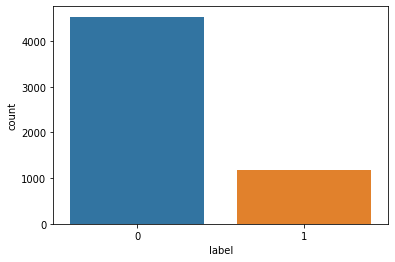

In [ ]:
sns.countplot(nov.label)
nov.label.value_counts()

In [ ]:
def score(data, predicted, prob_thres=0.5):
    print('Precision: {:.3f}'.format(precision_score(label, pred>prob_thres)))
    print('Recall: {:.3f}'.format(recall_score(label, pred>prob_thres)))
    print('F1 Score: {:.3f}'.format(f1_score(label, pred>prob_thres)))
    print('ROC AUC Score: {:.3f}'.format(roc_auc_score(label, pred)))